<a href="https://colab.research.google.com/github/9046balaji/collage-projects/blob/main/houseproce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;
from sklearn.metrics import mean_squared_error,r2_score;
from sklearn.linear_model import Ridge,Lasso;
from sklearn.preprocessing import LabelEncoder,StandardScaler;
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Housing (1).csv')

In [ ]:
label_encoder = LabelEncoder()
exclude_columns = ['hotwaterheating', 'airconditioning', 'prefarea']

for col in df.columns:
    if col not in exclude_columns:
        df[col] = label_encoder.fit_transform(df[col])  # yes -> 1 no -> 0



In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.shape

(545, 13)

In [ ]:
print("head\n");
df.head()

head



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,218,232,3,1,2,1,0,0,no,yes,2,yes,0
1,217,260,3,3,3,1,0,0,no,yes,3,no,0
2,217,268,2,1,1,1,0,1,no,no,2,yes,1
3,216,237,3,1,1,1,0,1,no,yes,3,yes,0
4,215,232,3,0,1,1,1,1,no,yes,2,no,0


In [ ]:
print("tail\n");
df.tail()

tail



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,2,39,1,0,0,1,0,1,no,no,2,no,2
541,1,15,2,0,0,0,0,0,no,no,0,no,1
542,0,72,1,0,0,1,0,0,no,no,0,no,2
543,0,35,2,0,0,0,0,0,no,no,0,no,0
544,0,90,2,0,1,1,0,0,no,no,0,no,2


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,95.728440,135.471560,1.965138,0.286239,0.805505,0.858716,0.177982,0.350459,0.693578,1.069725
std,56.256108,76.059693,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.861586,0.761373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,71.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,87.000000,130.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,137.000000,196.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,218.000000,283.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000


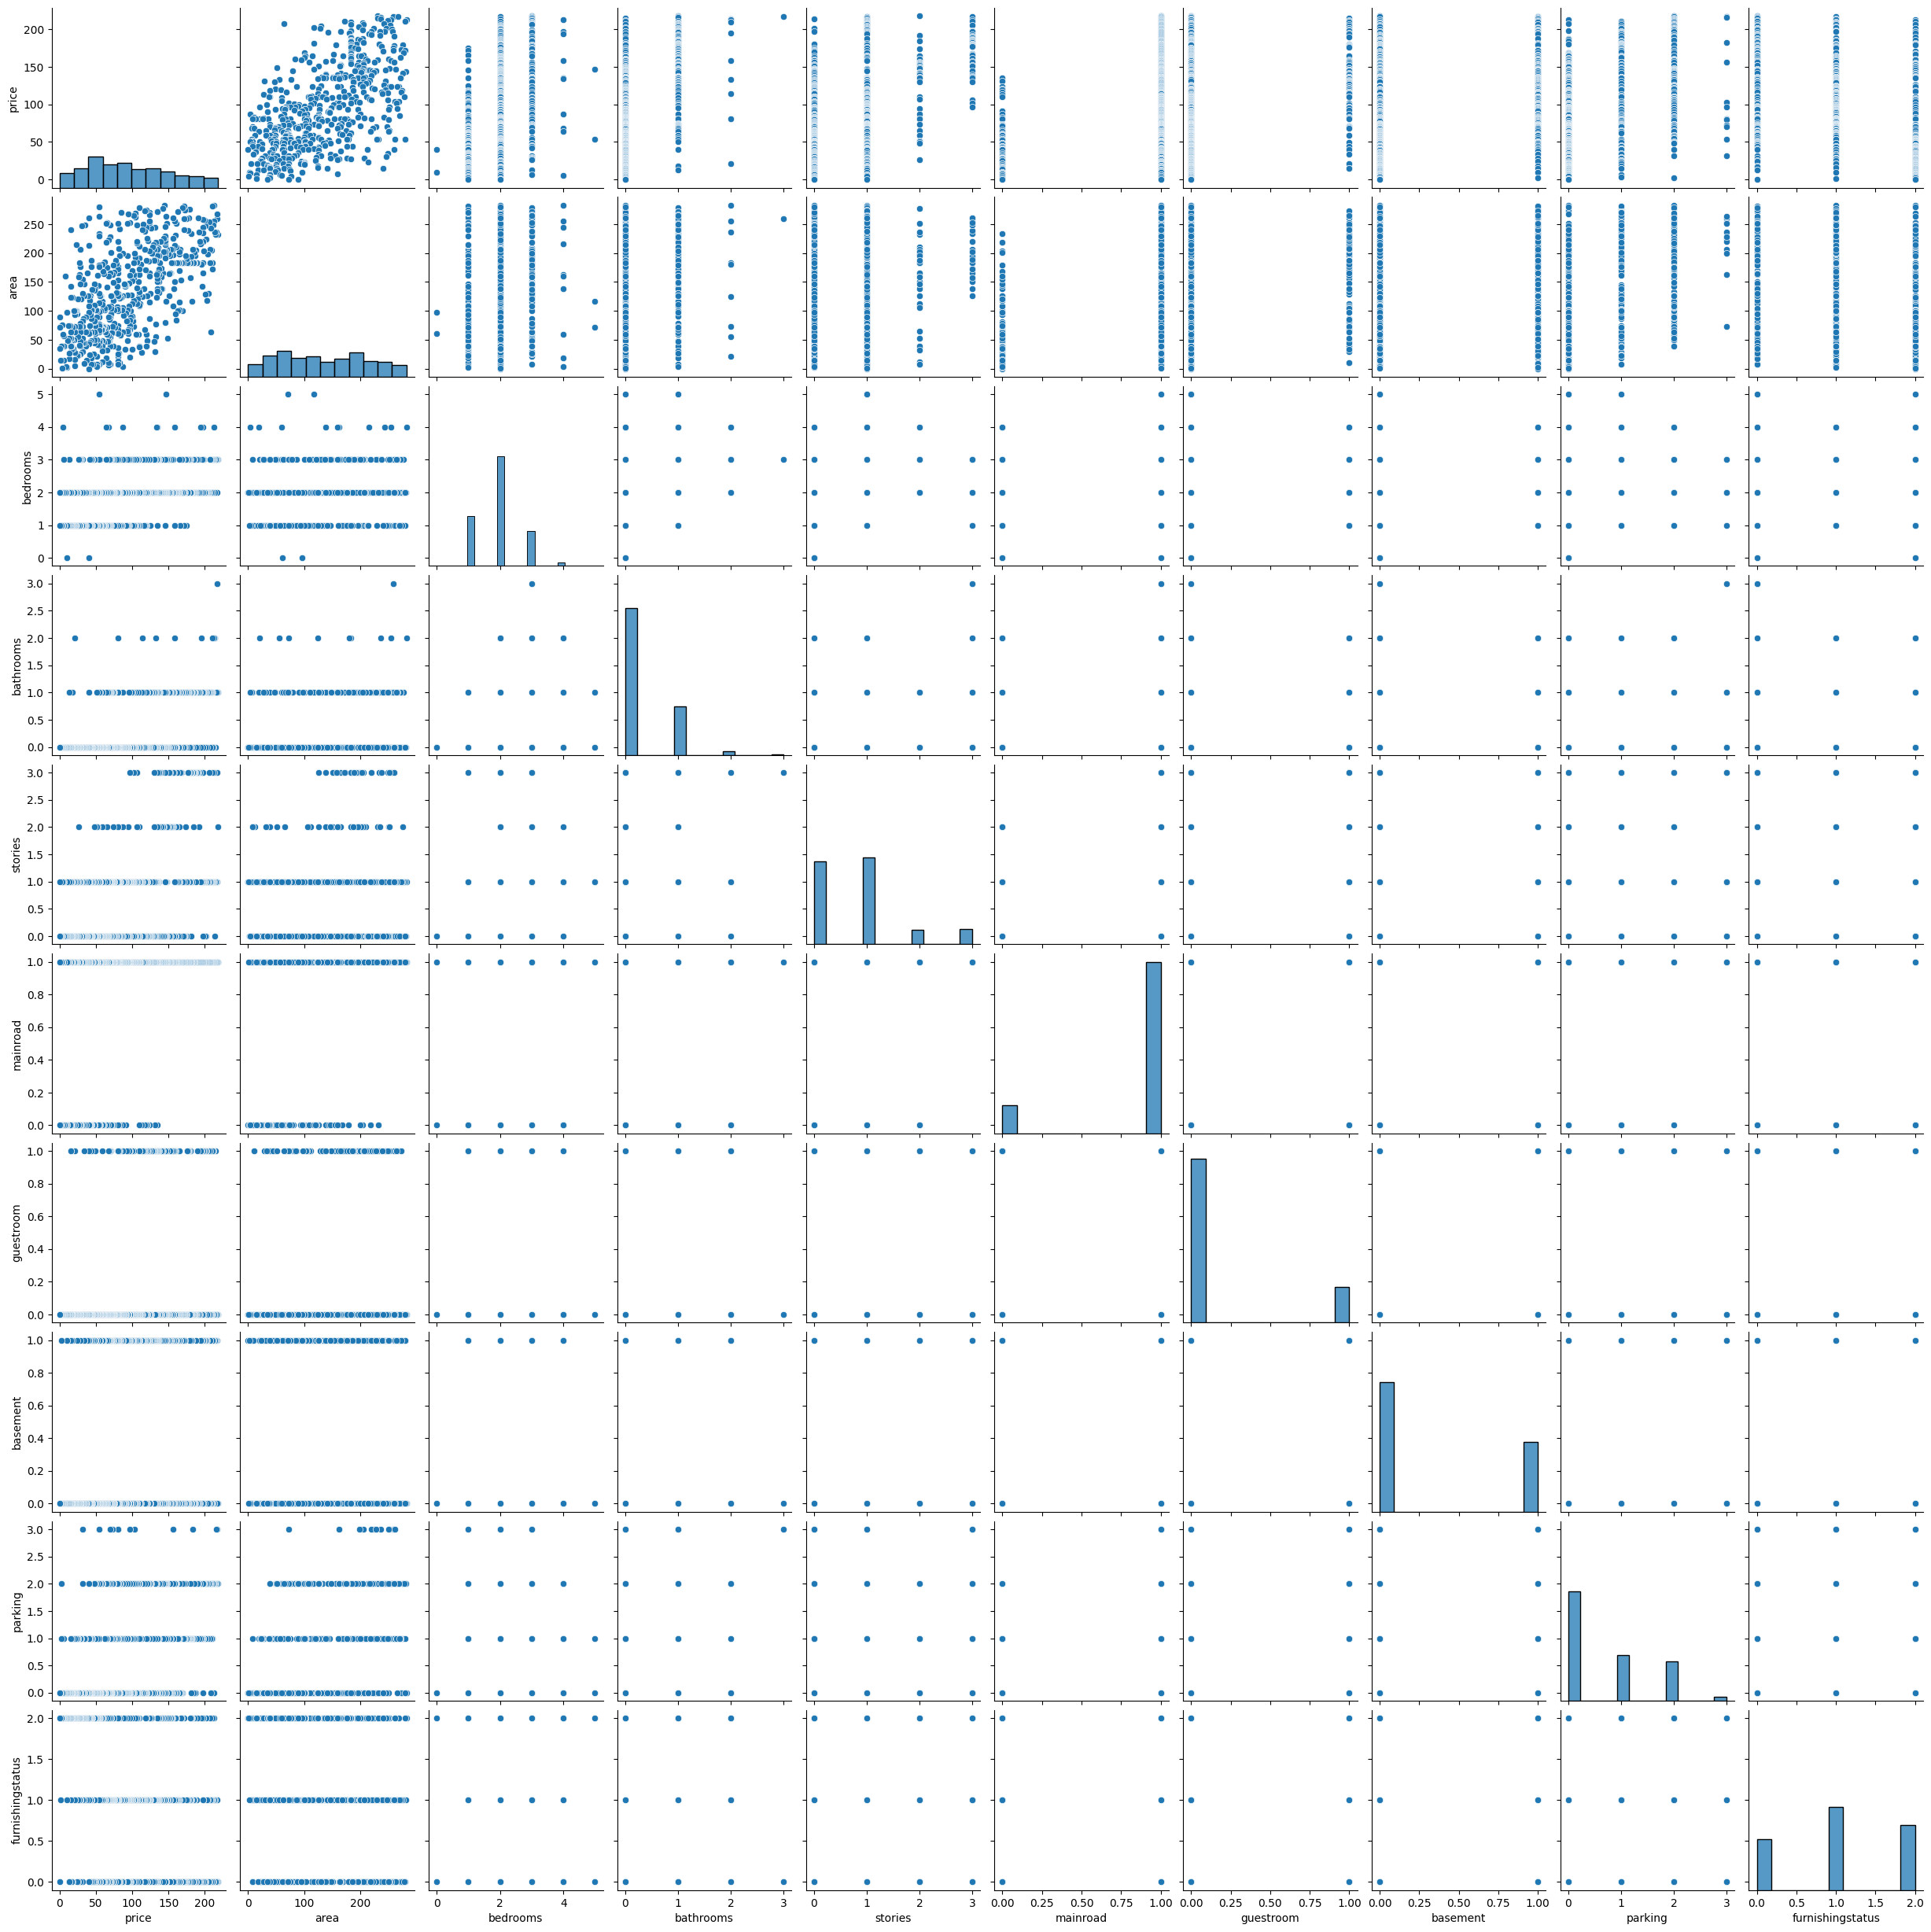

In [ ]:
sns.pairplot(df)

<Axes: >

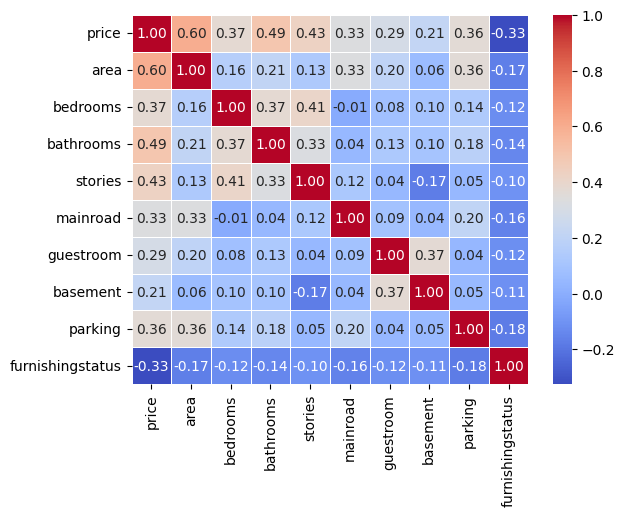

In [ ]:
corr_data=df.drop(columns=['hotwaterheating','airconditioning','prefarea'])
corr_matrix=corr_data.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

In [ ]:
x=df.iloc[:,1:4]
y=df['price']

In [ ]:
x,y

(     area  bedrooms  bathrooms
 0     232         3          1
 1     260         3          3
 2     268         2          1
 3     237         3          1
 4     232         3          0
 ..    ...       ...        ...
 540    39         1          0
 541    15         2          0
 542    72         1          0
 543    35         2          0
 544    90         2          0
 
 [545 rows x 3 columns],
 0      218
 1      217
 2      217
 3      216
 4      215
       ... 
 540      2
 541      1
 542      0
 543      0
 544      0
 Name: price, Length: 545, dtype: int64)

In [ ]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
slope=lr.coef_
intercept=lr.intercept_
print("Slope :",slope)
print("Intercept :",intercept)

Slope : [27.98581332  8.12210123 18.92236139]
Intercept : 95.84159346669415


In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error :",mse)

Mean squared error : 1622.5629412113105


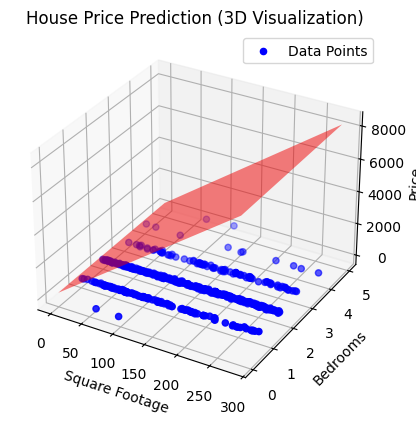

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['area'],df['bedrooms'],y,color='blue',label='Data Points')

x1_range=np.linspace(min(df['area']),max(df['area']),10)
x2_range=np.linspace(min(df['bedrooms']),max(df['bedrooms']),10)
X1,X2=np.meshgrid(x1_range,x2_range)

fixed_age=10
Y_pred=lr.predict(np.c_[X1.ravel(), X2.ravel(), np.full_like(X1.ravel(),fixed_age)])

Y_pred=Y_pred.reshape(X1.shape)

ax.plot_surface(X1,X2,Y_pred,color='red',alpha=0.5,rstride=100,cstride=100)

ax.set_xlabel('Square Footage')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('House Price Prediction (3D Visualization)')

plt.legend()
plt.show()

In [ ]:
X_uni=df['area']
X_uni=X_uni.values.reshape(-1,1)
y_uni=df['price']

In [ ]:
x_uni_train,x_uni_test,y_uni_train,y_uni_test=train_test_split(X_uni,y_uni,test_size=0.2,shuffle=True)

In [ ]:
lr_uni=LinearRegression()

In [ ]:
lr_uni.fit(x_uni_train,y_uni_train)

LinearRegression()

In [ ]:
y_pred=lr_uni.predict(x_uni_test)

In [ ]:
slope_uni=lr_uni.coef_
intercept_uni=lr_uni.intercept_
print("Slope :",slope_uni)
print("Intercept :",intercept_uni)

Slope : [0.45428314]
Intercept : 34.104121983053496


In [ ]:
mse_uni=mean_squared_error(y_test,y_pred)
print("Mean squared error :", mse)

Mean squared error : 1622.5629412113105


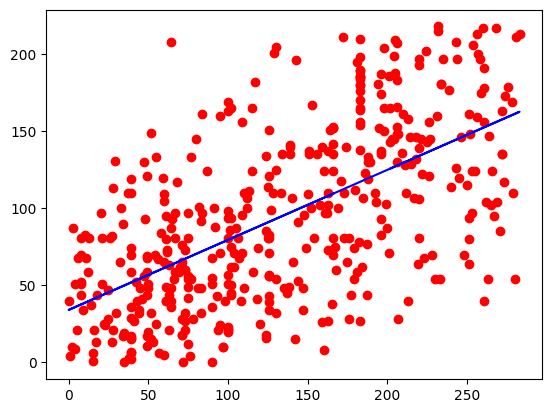

In [ ]:
plt.scatter(x_uni_train,y_uni_train,color='red')
plt.plot(x_uni_train,lr_uni.predict(x_uni_train),color='blue')

In [ ]:

X_no_const=pd.DataFrame(x)
X_no_const.columns=['area','bedrooms','bathrooms']
print(X_no_const.columns)

Index(['area', 'bedrooms', 'bathrooms'], dtype='object')


In [ ]:
vif_data=pd.DataFrame()
vif_data['Feature']=X_no_const.columns
vif_data['VIF']=[variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

In [ ]:
vif_data

,Feature,VIF
0,area,1.055819
1,bedrooms,1.172682
2,bathrooms,1.194739


In [ ]:
alpha=1.0
ridge_model=Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)

Ridge()

In [ ]:
y_pred_train=ridge_model.predict(x_train)
y_pred_test=ridge_model.predict(x_test)

In [ ]:
train_mse=mean_squared_error(y_train, y_pred_train)
test_mse=mean_squared_error(y_test, y_pred_test)

In [ ]:
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Model coefficients: {ridge_model.coef_}")

Training Mean Squared Error: 1472.9009
Testing Mean Squared Error: 1622.7174
Model coefficients: [27.92942429  8.12424738 18.89175989]


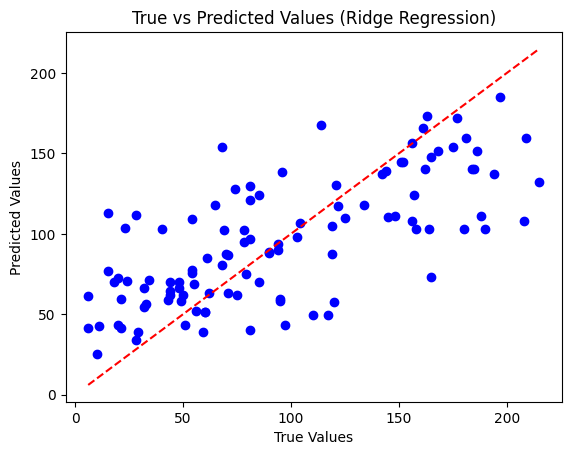

In [ ]:
plt.scatter(y_test,y_pred_test,color='blue')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Ridge Regression)')
plt.show()

In [ ]:
alpha=0.1
lasso_model=Lasso(alpha=alpha)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_train=lasso_model.predict(x_train)
y_pred_test=lasso_model.predict(x_test)

In [ ]:
train_mse=mean_squared_error(y_train,y_pred_train)
test_mse=mean_squared_error(y_test,y_pred_test)

In [ ]:
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Model coefficients: {lasso_model.coef_}")

Training Mean Squared Error: 1472.9161
Testing Mean Squared Error: 1623.6439
Model coefficients: [27.91275277  8.05133267 18.86474564]


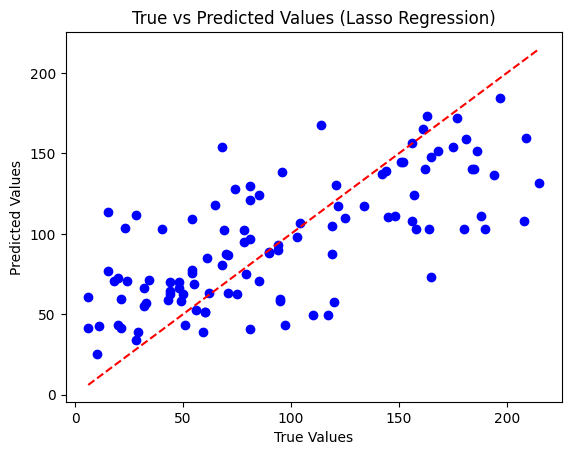

In [ ]:
plt.scatter(y_test,y_pred_test,color='blue')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Lasso Regression)')
plt.show()


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Linear Regression): {r2:.4f}")


R² Score (Linear Regression): -0.4006


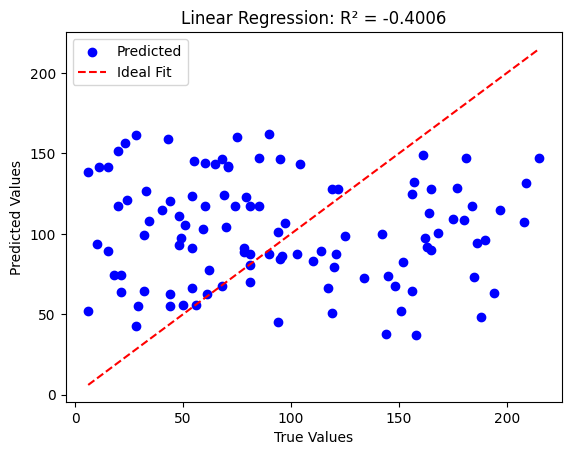

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression: R² = {r2_score(y_test, y_pred):.4f}')
plt.legend()
plt.show()


In [ ]:
r2_train_ridge = r2_score(y_train, y_pred_train)
r2_test_ridge = r2_score(y_test, y_pred_test)

print(f"Training R² Score (Ridge Regression): {r2_train_ridge:.4f}")
print(f"Testing R² Score (Ridge Regression): {r2_test_ridge:.4f}")


Training R² Score (Ridge Regression): 0.5291
Testing R² Score (Ridge Regression): 0.5051


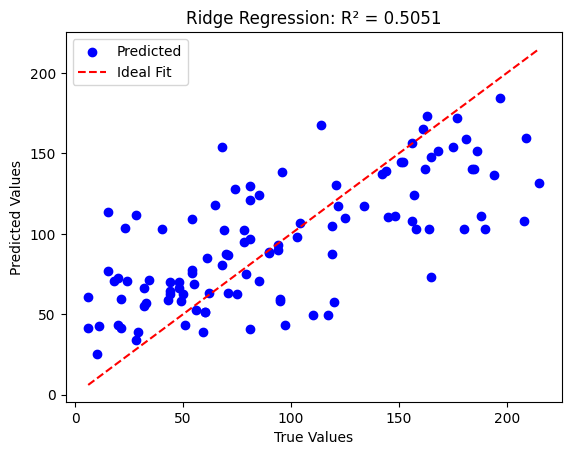

In [ ]:
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Ridge Regression: R² = {r2_score(y_test, y_pred_test):.4f}')
plt.legend()
plt.show()


In [ ]:
r2_train_lasso = r2_score(y_train, y_pred_train)
r2_test_lasso = r2_score(y_test, y_pred_test)

print(f"Training R² Score (Lasso Regression): {r2_train_lasso:.4f}")
print(f"Testing R² Score (Lasso Regression): {r2_test_lasso:.4f}")


Training R² Score (Lasso Regression): 0.5291
Testing R² Score (Lasso Regression): 0.5051


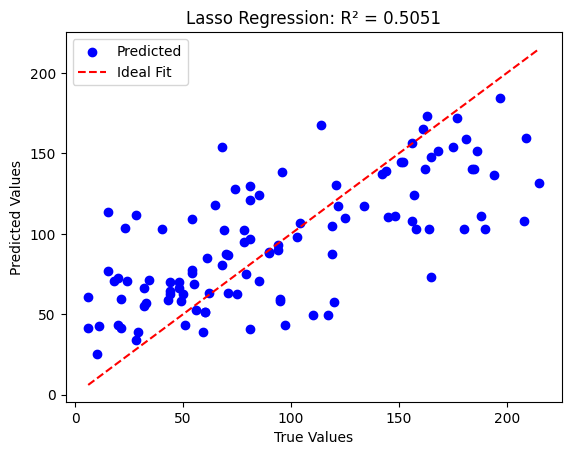

In [ ]:
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Lasso Regression: R² = {r2_score(y_test, y_pred_test):.4f}')
plt.legend()
plt.show()
